In [2]:
import matplotlib.pyplot as plt
from __future__ import annotations
from BikeData import BikeData
import pandas as pd
from scipy import stats
import numpy as np

# Bike Data
The `BikeData` class allows for easy manipulation of the washington bike data. You can call it either on a csv file or a `pd.DataFrame` object. The `subset` method is the main way of filtering the data. If you read the docstring examples of how to use it are given if you do not understand the code.

The `union` method is used to join two mutually exclusive subsets. This is useful during peak hours which occur over two windows of time.

## Total bike rental

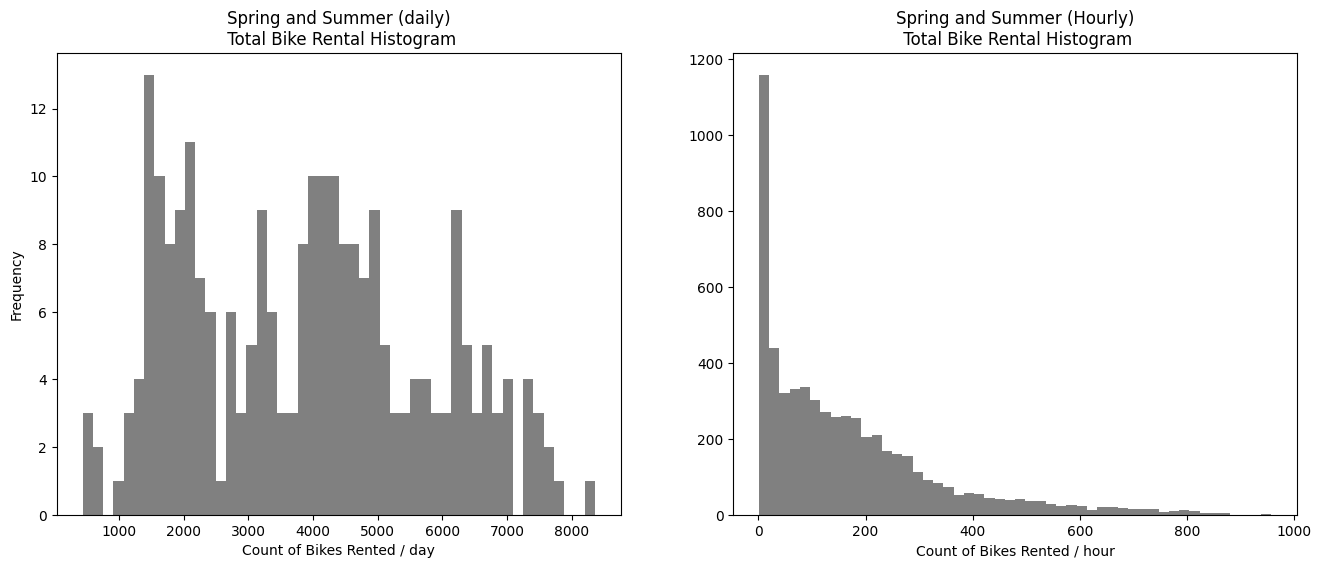

In [3]:
"""
Here I create two instances of the BikeData Class one with the hourly data
and one with the daily data. I then create subset of only working days and
non holiday days during spring and summer. The .data method calls a data
frame with the same column headings as the input data. The 'cnt' column is
The total count column. These are then plotted.
"""

daily = BikeData("day.csv")
hourly = BikeData("hour.csv")
spring_summer = daily.subset(leq={"season": 2}, eq={"holiday": 0, "workingday":1})
spring_summer_hour = hourly.subset(leq={"season": 2}, eq={"holiday": 0, "workingday":1})
s_s_count, s_s_count_hr = spring_summer.data["cnt"], spring_summer_hour.data["cnt"]
fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].hist(s_s_count, bins=50, color="grey")
ax[1].hist(s_s_count_hr, bins=50, color="grey")
ax[0].set_title("Spring and Summer (daily)\n Total Bike Rental Histogram")
ax[1].set_title("Spring and Summer (Hourly)\n Total Bike Rental Histogram")
ax[0].set_xlabel("Count of Bikes Rented / day")
ax[1].set_xlabel("Count of Bikes Rented / hour")
ax[0].set_ylabel("Frequency");

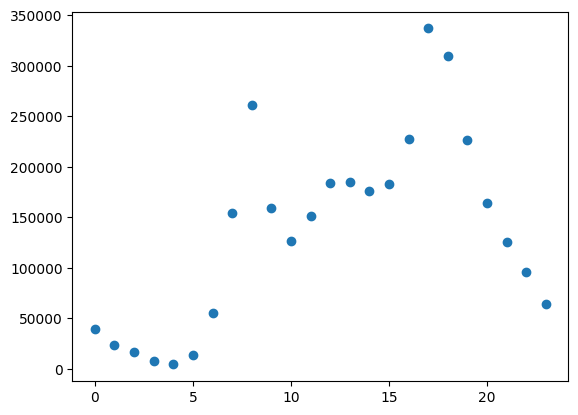

In [4]:
hourly_counts = []
for i in range(24):
    hourly_counts.append(np.sum(hourly.data["cnt"][hourly.data["hr"] == i]))
plt.scatter([i for i in range(24)], hourly_counts)

## Total Bike Rental Split By Season

/home/sean/miniconda3/envs/comp_0171/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


instant            12763
dteday        2012-06-20
season                 2
yr                     1
mnth                   6
hr                    23
holiday                1
weekday                6
workingday             1
weathersit             3
temp                0.94
atemp             0.8788
hum                  1.0
windspeed         0.7164
casual               361
registered           782
cnt                  957
dtype: object


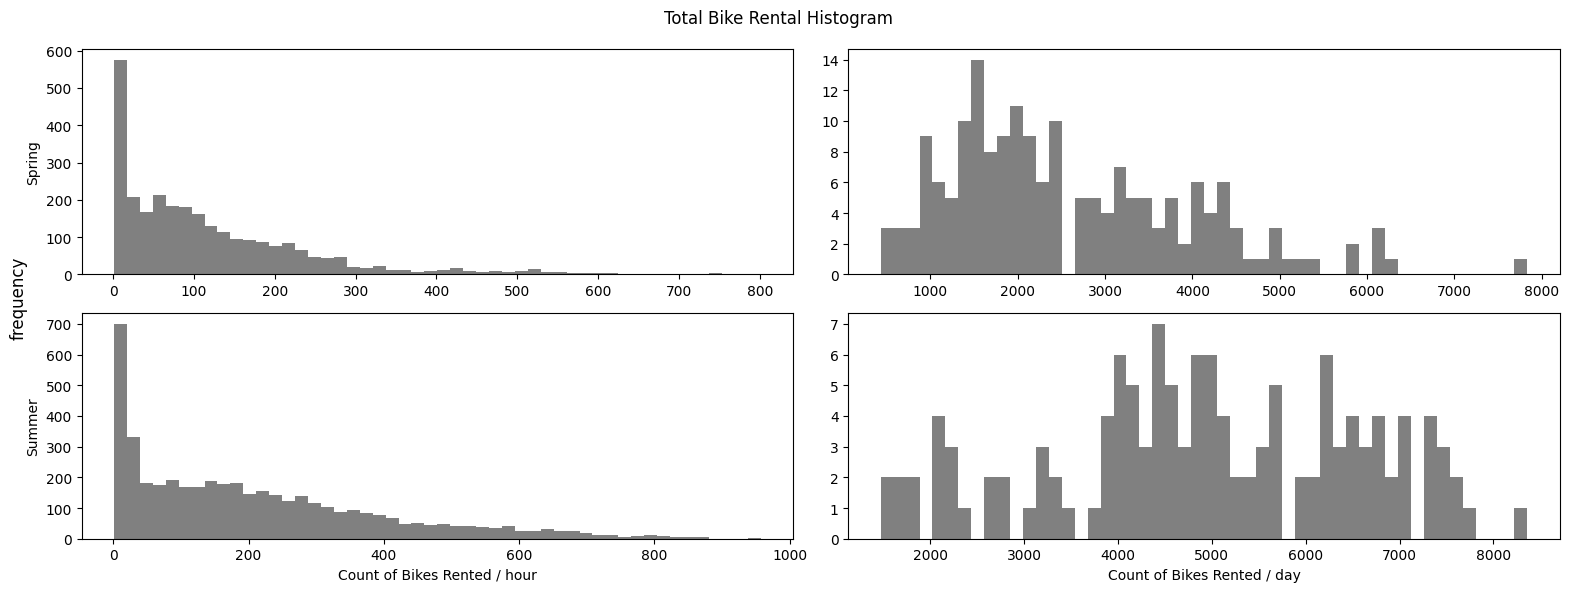

In [5]:
"""
Here I take the daily and hourly bikedata objects and make new subsets from
them. Where each one is a separate season.
"""
spring = daily.subset(eq={"season": 1})
summer = daily.subset(eq={"season": 2, "holiday": 0, "workingday": 1})
summer_h = hourly.subset(eq={"season": 2})
print(np.max(summer_h.data))
spring_h = hourly.subset(eq={"season": 1, "holiday": 0, "workingday": 1})
h_d = {"Spring": (spring_h, spring), "Summer": (summer_h, summer)}

fig, ax = plt.subplots(2, 2, figsize=(16, 6))
for i, (season, (hour, day)) in enumerate(h_d.items()):
    ax[i, 0].hist(hour.data["cnt"], bins=50, color="grey")
    ax[i, 1].hist(day.data["cnt"], bins=50, color="grey")
    ax[i, 0].set_ylabel(season)
fig.suptitle("Total Bike Rental Histogram")
ax[1, 1].set_xlabel("Count of Bikes Rented / day")
ax[1, 0].set_xlabel("Count of Bikes Rented / hour");
fig.supylabel("frequency")
fig.tight_layout();

## Peak Hours Total Bike Rental Split By Season

In [39]:
"""
In the final plot, I form new subsets where they are mutually exclusive.
The morning peak hours are the first selections using the geq and leq
operators. Then I use the union join operator, because the morning and
evening hours are mutually exclusive, I could have made subsets from the
previously created ones.
"""
import numpy as np
peak_start = 15
peak_end = 19
user_type = "casual"
user_type_list = ["casual","registered", "cnt"]
color = ["green", "red", "black"]

summer_peak = hourly.subset(leq={"hr": peak_end}, geq={"hr":peak_start},
                         eq={"season":2, "workingday":1,})
spring_peak = hourly.subset(leq={"hr": peak_end}, geq={"hr":peak_start},
                         eq={"season": 1, "workingday":1,})
print(spring_peak.data.shape)
print(summer_peak.data.shape)
for user_t in user_type_list:
    val, bins = np.histogram(summer_peak.data[user_t], bins=summer_peak.data[user_t].shape[0] )

    print("summer, type of user", user_t, stats.shapiro(val))
    print("summer, type of user", user_t, stats.anderson(val, dist="norm"))

    val, bins = np.histogram(spring_peak.data[user_t],bins=spring_peak.data[user_t].shape[0])
    print("spring, type of user", user_t, "shapiro", stats.shapiro(val),)
    print("spring, type of user", user_t, stats.anderson(val, dist="norm"),"\n")
    #print("summer", "log",user_t, stats.shapiro(np.log(summer_peak.data[user_t])))
    #print("spring",user_t, stats.shapiro((spring_peak.data[user_t])))
    #print("spring", "log",user_t, stats.shapiro(np.log(spring_peak.data[user_t])))

(197, 17)
(215, 17)
summer, type of user casual ShapiroResult(statistic=0.6827290058135986, pvalue=6.963999326636701e-20)
summer, type of user casual AndersonResult(statistic=27.415544181965515, critical_values=array([0.566, 0.644, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
spring, type of user casual shapiro ShapiroResult(statistic=0.3830535411834717, pvalue=1.7561384813758599e-25)
spring, type of user casual AndersonResult(statistic=51.65868162310892, critical_values=array([0.565, 0.643, 0.772, 0.9  , 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) 

summer, type of user registered ShapiroResult(statistic=0.8238809704780579, pvalue=7.150313327541902e-15)
summer, type of user registered AndersonResult(statistic=13.190783456384793, critical_values=array([0.566, 0.644, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
spring, type of user registered shapiro ShapiroResult(statistic=0.7649322152137756,

In [57]:
peak_start = 15
peak_end = 19
user_type = "casual"
user_type_list = ["casual", "registered", "cnt"]
color = ["green", "red", "black"]


for sp_mnt, su_mnth in zip(range(1,3), range(5,7)):
    summer_peak_mn = hourly.subset(leq={"hr": peak_end}, geq={"hr":peak_start},
                                eq={"season":2, "workingday":1, "mnth": su_mnth})
    spring_peak_mn = hourly.subset(leq={"hr": peak_end}, geq={"hr":peak_start},
                                eq={"season": 1, "workingday":1, "mnth": sp_mnt})

    print("\n")
    for user_t in user_type_list:

        _, p_shap= stats.shapiro(summer_peak_mn.data["cnt"])
        print(f"Summer month {su_mnth} pval shapiro:{p_shap}" )
        ad_stat, lev,_ = stats.anderson(summer_peak_mn.data["cnt"], dist="norm")
        print(f"Anderson Statistic {ad_stat} Anderson Levels{lev}, sig_lev:{_}\n")
        _, p_shap = stats.shapiro(spring_peak_mn.data["cnt"])
        print(f"Spring month {sp_mnt} pval shapiro:{p_shap}" )
        ad_stat, lev, _ = stats.anderson(spring_peak_mn.data["cnt"], dist="norm")
        print(f"Anderson Statistic {ad_stat} Anderson Levels{lev}, sig_lev:{_}\n")




Summer month 5 pval shapiro:1.3477093489200342e-05
Anderson Statistic 2.3547955712184034 Anderson Levels[0.566 0.644 0.773 0.902 1.073], sig_lev:[15.  10.   5.   2.5  1. ]

Spring month 1 pval shapiro:4.5677731042026437e-10
Anderson Statistic 6.321833202696041 Anderson Levels[0.565 0.643 0.772 0.9   1.071], sig_lev:[15.  10.   5.   2.5  1. ]

Summer month 5 pval shapiro:1.3477093489200342e-05
Anderson Statistic 2.3547955712184034 Anderson Levels[0.566 0.644 0.773 0.902 1.073], sig_lev:[15.  10.   5.   2.5  1. ]

Spring month 1 pval shapiro:4.5677731042026437e-10
Anderson Statistic 6.321833202696041 Anderson Levels[0.565 0.643 0.772 0.9   1.071], sig_lev:[15.  10.   5.   2.5  1. ]

Summer month 5 pval shapiro:1.3477093489200342e-05
Anderson Statistic 2.3547955712184034 Anderson Levels[0.566 0.644 0.773 0.902 1.073], sig_lev:[15.  10.   5.   2.5  1. ]

Spring month 1 pval shapiro:4.5677731042026437e-10
Anderson Statistic 6.321833202696041 Anderson Levels[0.565 0.643 0.772 0.9   1.071],

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


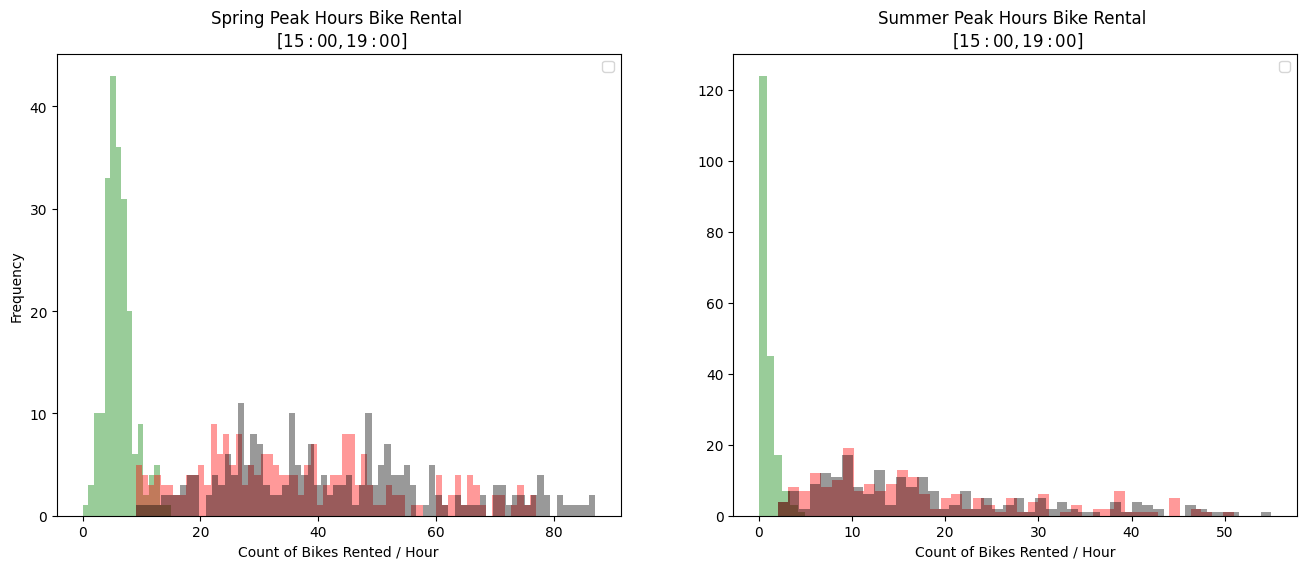

In [58]:

fig, ax = plt.subplots(1,2, figsize=(16,6))
for u_type, color in zip(user_type_list, color):
    spring_data = spring_peak.data[u_type]//10
    unique_sp_val = len(np.unique(spring_data))
    summer_data = summer_peak.data[u_type]//10
    unique_su_val = len(np.unique(summer_data))
    ax[0].hist(summer_data, bins=unique_su_val, color=color, alpha=0.4)
    ax[1].hist(spring_data, bins=unique_sp_val, color = color, alpha=0.4)
ax[0].set_title(f"Spring Peak Hours Bike Rental \n $[{peak_start}:00, {peak_end}:00]$")
ax[1].set_title(f"Summer Peak Hours Bike Rental \n $[{peak_start}:00, {peak_end}:00]$")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Count of Bikes Rented / Hour")
ax[1].set_xlabel("Count of Bikes Rented / Hour")
ax[0].set_ylabel("Frequency");


In [59]:
spring_shap = stats.shapiro(spring_peak.data["cnt"])
summer_shap = stats.shapiro(summer_peak.data["cnt"])

print("Pvalue for unbinned spring", spring_shap[1])
print("\nPvalue for unbinned summer", summer_shap[1])

Pvalue for unbinned spring 4.5677731042026437e-10

Pvalue for unbinned summer 1.3477093489200342e-05


['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
(597, 17)


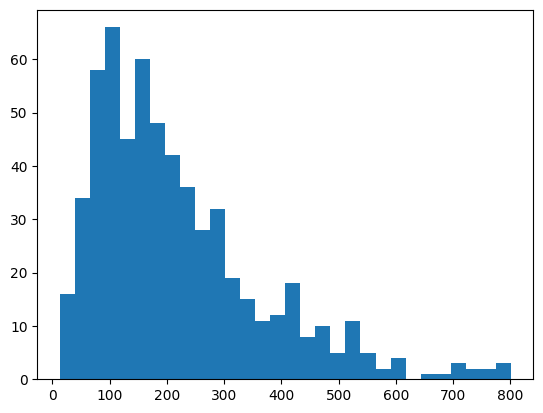

In [60]:
hour = pd.read_csv("hour.csv")
print(hour.columns.to_list())
mask = (hour["season"]==1) & (hour["holiday"]==0) & (hour["workingday"]==1) & (hour["hr"] >= 15) & (hour["hr"] <= 19)
hour_subset = hour[mask]
plt.hist(hour_subset["cnt"], bins=30)
print(hour_subset.shape)

# Data Exploration Notebook

Looking at different features of the bike rental data.

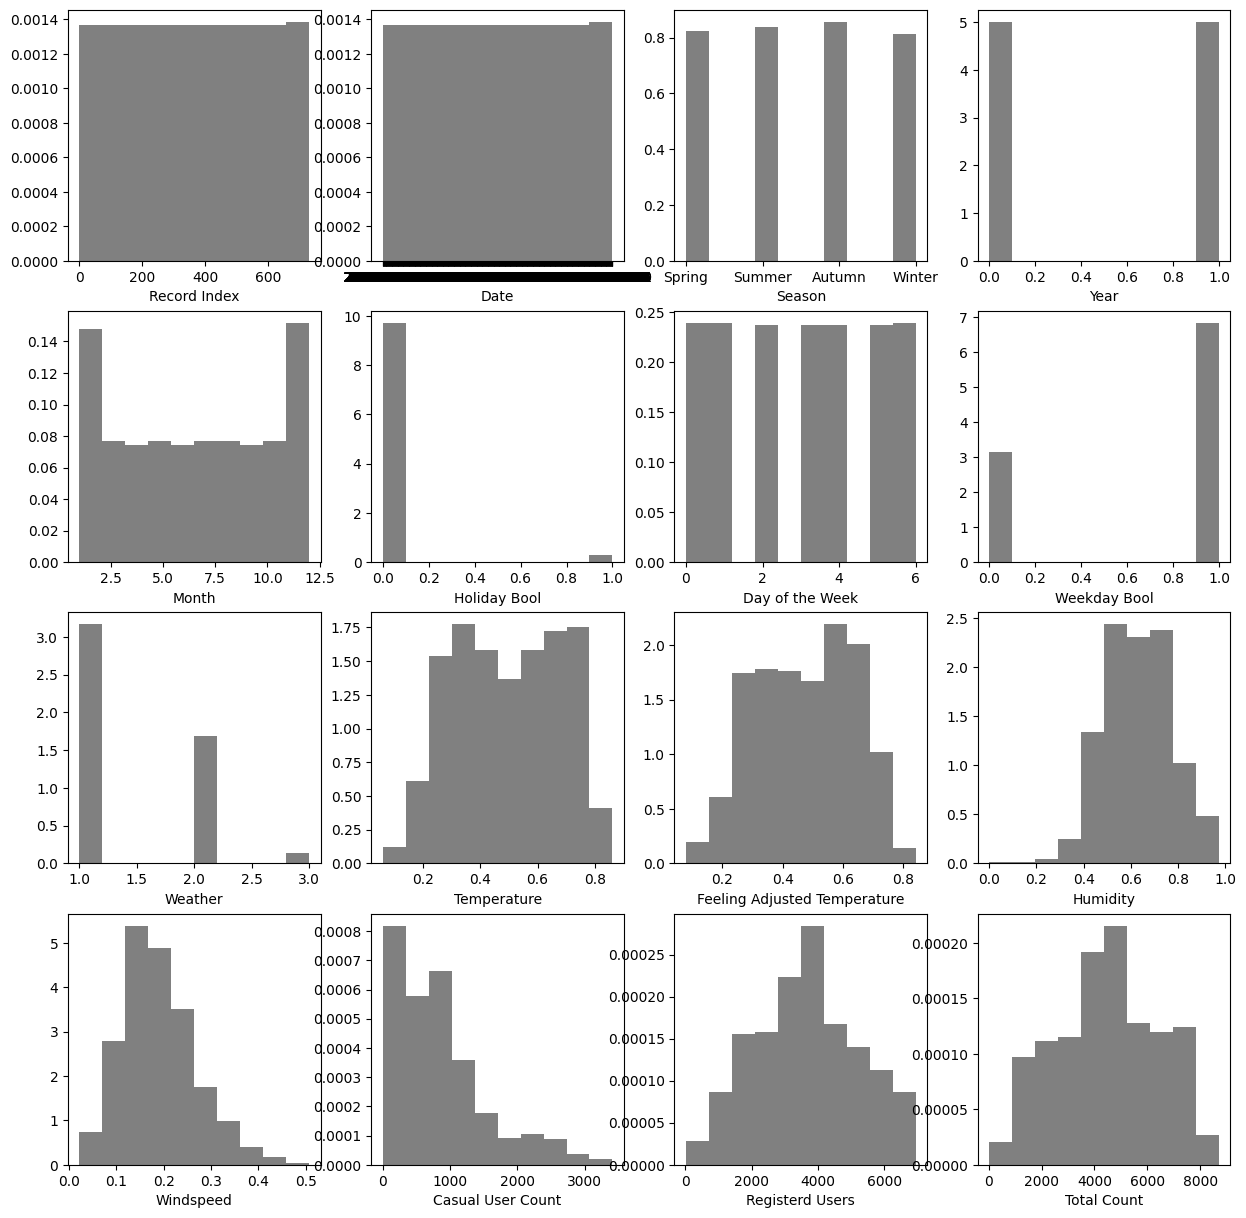

In [9]:
day_df = daily.data

season_list = ["Spring", "Summer", "Autumn", "Winter"]
year_dict = {0: "2011", 1: "2012"}
x_label_dict = ["Record Index", "Date", "Season", "Year",
                "Month", "Holiday Bool", "Day of the Week", "Weekday Bool", "Weather", "Temperature", "Feeling Adjusted Temperature", "Humidity", "Windspeed", "Casual User Count", "Registerd Users",
                "Total Count"
                ]
fig, ax = plt.subplots(4,4, figsize=(15,15))
for i, feature in enumerate(day_df.columns.tolist()):
    ax[i//4 ,i%4].hist(day_df[feature], density=True, color="grey")
    ax[i//4, i%4].set_xlabel(feature)
    ax[i//4, i%4].set_xlabel(x_label_dict[i])
ax[0, 2].set_xticks([i + 1 for i in range(4)], season_list);
ax[0, 1].set_xticks;

# Bike Hire Tasks Outlined
We have data from a bike hire scheme in washington, for days across two years. We are asked two questions about the dataset:
1. Does the bike hire data during peak hours across spring and summer, follow a normal distribution? To answer this question hypothesis testing is used.
2. Do the distributions of bike hire change between spring and summer?

These questions are clearly asked about a subset of the total data set. The data is only a member of summer spring, the peak times are clearly more important. Peak hours are quite ambiguous, and making the cutoff on my own without the team and visualisations is a bad idea. -Sean



In [71]:
hourly.data[["mnth", "season"]]

,mnth,season
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
17374,12,1
17375,12,1
17376,12,1
17377,12,1


In [74]:
hourly.data.iloc[[1807,1806]]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1807,1808,2011-03-21,2,0,3,0,0,1,1,3,0.34,0.303,0.66,0.3881,2,11,13
1806,1807,2011-03-20,1,0,3,23,0,0,0,3,0.34,0.303,0.61,0.3881,13,11,24


In [76]:
hourly.data.iloc[[4009,4010]]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4009,4010,2011-06-20,2,0,6,23,0,1,1,1,0.62,0.5909,0.78,0.2537,10,50,60
4010,4011,2011-06-21,3,0,6,0,0,2,1,1,0.62,0.5909,0.78,0.1642,10,23,33


In [79]:
hourly.data.iloc[[17116,17117]]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17116,17117,2012-12-20,4,1,12,23,0,4,1,3,0.40,0.4091,0.82,0.2985,0,13,13
17117,17118,2012-12-21,1,1,12,0,0,5,1,3,0.42,0.4242,0.88,0.2985,0,17,17
